# Tính diễn biến mực nước dòng chảy ở cửa sông, lạch triều

Một số gỉa thiết đơn giản:
* Mặt cắt ngang cửa sông/lạch triều không đổi
* Lưu lượng từ thượng lưu sông rất nhỏ
* Dao động thủy triều ngoài biển là 1 sóng hình sin
* Dòng chảy chỉ do độ dốc mặt nước. Chưa xét đến các thành phần lực ma sát, Coriolis.

In [3]:
# File NCKHSV Chu Văn Tùng, Đồng Thị Dung, Nguyễn T Thu Trang, Vũ Đình Dũng (2015)

N = 36;     # số đoạn 
L = 5000    # chiều dài lạch 
dx = L/N
dt = 1;
a = 1.4;
initial_eta = 0.;
sum = 0;
u = [1:N+1]*0.;
ux = [1:N+1]*0.;
η = [1:N]*0.;
px = [1:N]*0.;
for i = 1:N;
    η[i] = initial_eta;
end;
u[N + 1]= 0;
tau = 1;
T = 86400;
t = 0;
ηbien(t) = a*sin(2*pi*t/T);
for tt = 0:50000;
    t = tt*dt;
    for i = 2:N;
        px[i]= (η[i]- η[i - 1]) / dx;
    end; 
    px[1] = (η[1] - ηbien(t)) / dx ;
    for i = 1:N;
        u[i]= u[i]+ dt*(-px[i]- u[i]/tau);
    end;
    for i = 1:N;
        ux[i]= (u[i + 1]- u[i])/dx;
    end;
    for i = 1:N;
        η[i]= η[i] - dt*ux[i];
        sum = sum + η[i];
    end;
end
η1 = η[:]

36-element Array{Float64,1}:
 0.218417   
 0.294019   
 0.176178   
 0.0785796  
 0.0290605  
 0.00931678 
 0.00265292 
 0.00068142 
 0.000159632
 3.43941e-5 
 6.86155e-6 
 1.27453e-6 
 2.21472e-7 
 ⋮          
 2.84759e-18
 2.67654e-19
 2.4291e-20 
 2.13105e-21
 1.80922e-22
 1.48791e-23
 1.18649e-24
 9.18224e-26
 6.90234e-27
 5.04381e-28
 3.58672e-29
 2.6489e-30 

In [4]:
t, ηbien(t)

(50000,-0.664440517646696)

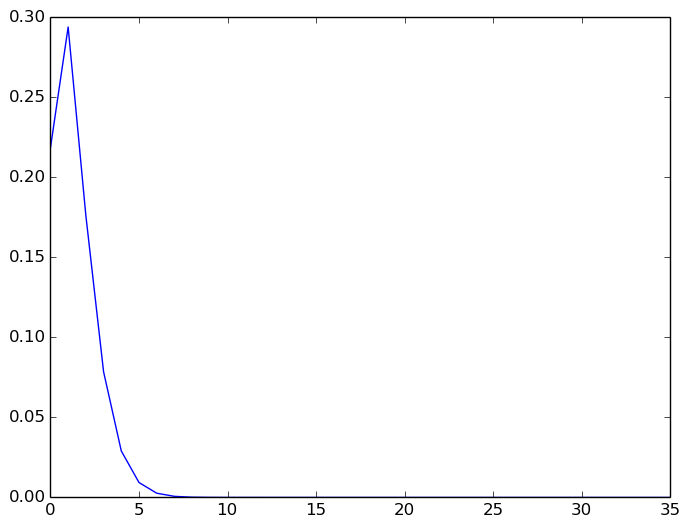

In [5]:
using PyPlot

plot(η)

writedlm("eta_t50000.txt", η)

Có thể mở rộng tính toán cho nhiều thời đoạn khác nhau. Lưu ý `tt` phải viết tiếp nối tăng dần và kết qủa trung gian của $\eta$ được lưu lại thành $\eta_1, \eta_2, \eta_3 ...$

In [2]:
N = 36;
L = 5000
dx = L/N
dt = 1;
a = 1.4;
initial_eta = 0.;
sum = 0;
u = [1:N+1]*0.;
ux = [1:N+1]*0.;
η = [1:N]*0.;
px = [1:N]*0.;
for i = 1:N;
    η[i] = initial_eta;
end;
u[N + 1]= 0;
tau = 1;
T = 86400;
t = 0;
ηbien(t) = a*sin(2*pi*t/T);

for tt = 0:50000;
    t = tt*dt;
    for i = 2:N;
        px[i]= (η[i]- η[i - 1]) / dx;
    end; 
    px[1] = (η[1] - ηbien(t)) / dx ;
    for i = 1:N;
        u[i]= u[i]+ dt*(-px[i]- u[i]/tau);
    end;
    for i = 1:N;
        ux[i]= (u[i + 1]- u[i])/dx;
    end;
    for i = 1:N;
        η[i]= η[i] - dt*ux[i];
        sum = sum + η[i];
    end;
end
η1 = η[:]     # nếu chỉ viết η1 = η thì sau này các η1, η2, ... đều trùng nhau.

for tt = 50000:100000;
    t = tt*dt;
    for i = 2:N;
        px[i]= (η[i]- η[i - 1]) / dx;
    end; 
    px[1] = (η[1] - ηbien(t)) / dx ;
    for i = 1:N;
        u[i]= u[i]+ dt*(-px[i]- u[i]/tau);
    end;
    for i = 1:N;
        ux[i]= (u[i + 1]- u[i])/dx;
    end;
    for i = 1:N;
        η[i]= η[i] - dt*ux[i];
        sum = sum + η[i];
    end;
end
η2 = η[:]

for tt = 100000:150000;
    t = tt*dt;
    for i = 2:N;
        px[i]= (η[i]- η[i - 1]) / dx;
    end; 
    px[1] = (η[1] - ηbien(t)) / dx ;
    for i = 1:N;
        u[i]= u[i]+ dt*(-px[i]- u[i]/tau);
    end;
    for i = 1:N;
        ux[i]= (u[i + 1]- u[i])/dx;
    end;
    for i = 1:N;
        η[i]= η[i] - dt*ux[i];
        sum = sum + η[i];
    end;
end
η3 = η[:]

36-element Array{Float64,1}:
 -0.363082   
  0.0421692  
  0.105181   
  0.0722359  
  0.0400014  
  0.0237243  
  0.016474   
  0.0120969  
  0.00845248 
  0.00539941 
  0.00313879 
  0.00167139 
  0.000822275
  ⋮          
  2.38648e-9 
  6.33302e-10
  1.6266e-10 
  4.04804e-11
  9.77109e-12
  2.28972e-12
  5.21361e-13
  1.15443e-13
  2.48775e-14
  5.22242e-15
  1.07572e-15
  2.54438e-16

INFO: Loading help data...


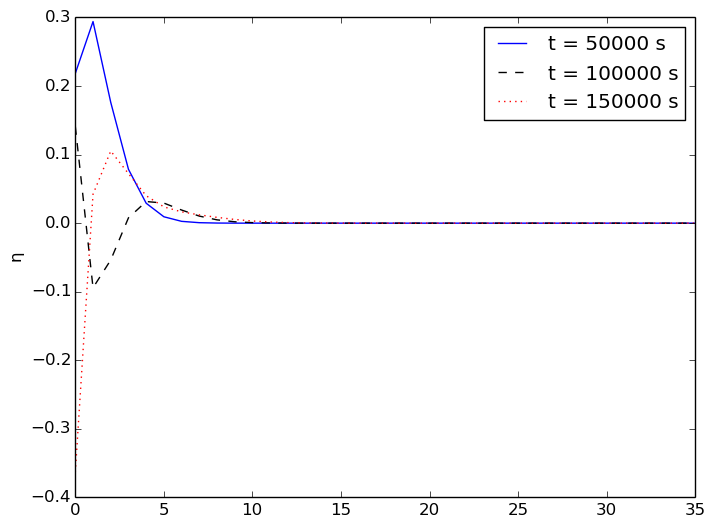

PyObject <matplotlib.text.Text object at 0x7f266d416790>

In [3]:
using PyPlot
plot(η1)
plot(η2, linestyle="--", color="black")
plot(η3, linestyle=":", color="red")
legend(["t = 50000 s", "t = 100000 s", "t = 150000 s"])
ylabel("η")

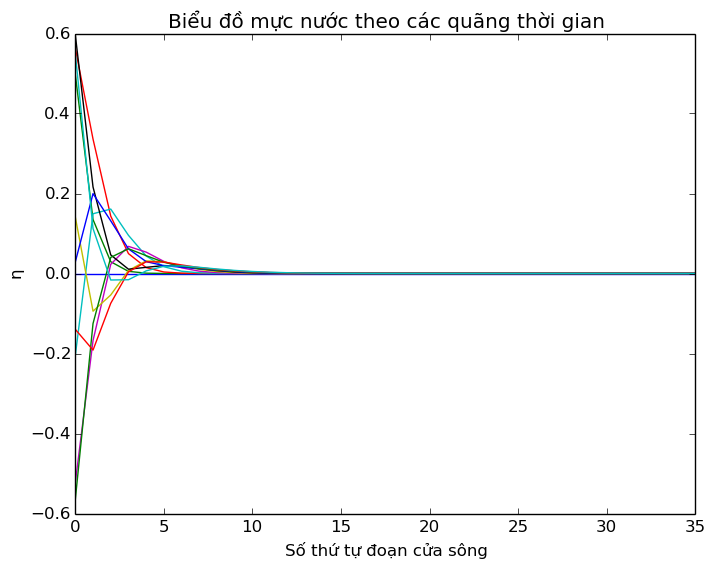

PyObject <matplotlib.text.Text object at 0x7f262dd57050>

In [5]:
N = 36
L = 5000
dx = L/N
dt = 1
a = 1.4
η₀ = 0.
u = [1:N+1]*0.
ux = [1:N+1]*0.
η = [1:N]*0.
px = [1:N]*0.
η = [1:N]*0 + η₀
u[N + 1] = 0.
tau = 1
T = 86400
t = 0
nseries = 0
ηt = zeros(100,N)

ηbien(t) = a*sin(2π*t/T)
for tt = 0:200000
    t = tt*dt;
    for i = 2:N;
        px[i]= (η[i]- η[i - 1]) / dx
    end; 
    px[1] = (η[1] - ηbien(t)) / dx ;
    for i = 1:N;
        u[i]= u[i]+ dt*(-px[i]- u[i]/tau);
    end;
    for i = 1:N;
        ux[i]= (u[i + 1]- u[i])/dx;
    end;
    for i = 1:N;
        η[i]= η[i] - dt*ux[i];
    end;
    if mod(tt, 20000) == 0
        nseries += 1
        ηt[nseries,:] = η[:]
        # mấu chốt vấn đề là copy nội dung η vào hàng thứ k của ma trận kết qủa ηt
    end
end

using PyPlot
for k = 1:nseries
    plot(ηt[k,:]')  # chuyển vị của vectơ, lệnh plot hơi khó tính 
end

xlabel("Số thứ tự đoạn cửa sông")
ylabel("η")
title("Biểu đồ mực nước theo các quãng thời gian")